,cpu,mem
time_stamp,,
1970-01-01 00:55:00,15.0,81.0
1970-01-01 01:00:00,14.0,83.0
1970-01-01 01:05:00,20.0,87.0
1970-01-01 01:10:00,15.0,84.0
1970-01-01 01:15:00,11.0,81.0


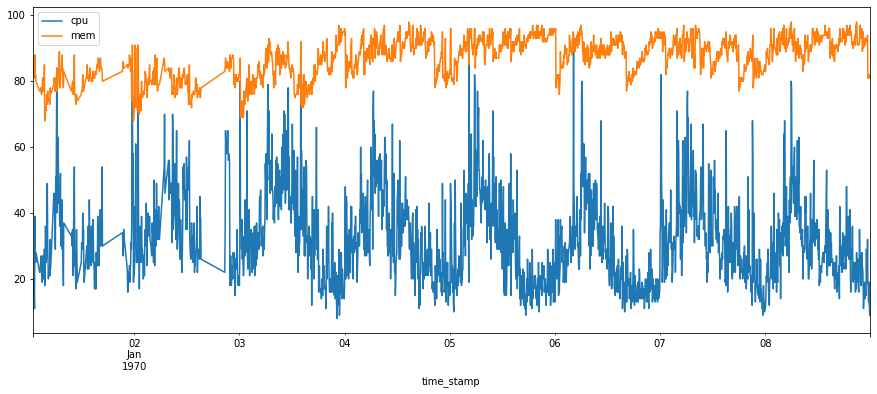

In [8]:
import pandas as pd

df = pd.read_csv('m_1938.csv')
df.columns = ['machine_id', 'time_stamp', 'cpu', 'mem', 'mem_gps', 'mkpi', 'net_in', 'net_out', 'disk_io_percent']
df.time_stamp = pd.to_datetime(df.time_stamp, unit='s')
df.set_index(df.time_stamp, inplace=True)
df = df[['cpu', 'mem']]
df = df.resample('5min').interpolate()
df = df.dropna()
df.plot(figsize=(15, 6))
df.head()

<AxesSubplot:xlabel='time_stamp'>

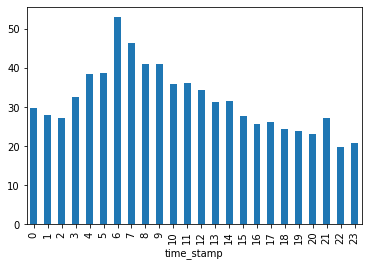

In [9]:
df.cpu.groupby(df.index.hour).mean().plot(kind='bar')

In [23]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima = SARIMAX(df.cpu, order=(3, 0, 2), seasonal_order=(0, 0, 0, 2)).fit()
(sarima.resid ** 2).mean()

orders = [(2, 0, 1), (3, 0, 1), (3, 0, 2), (2, 1, 1), (2, 1, 2), (3, 1, 1), (3, 1, 2), (3, 1, 3)]
best = 100000
for order in orders:
    try:
        model = ARIMA(serie, freq='5T', order=order).fit()
        erro = (model.resid ** 2).mean()
        if erro < best:
            best = erro
            print(order, erro)
            best_order = order
    except:
        pass

/home/danilo/dev/python/time_series/.time_series/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


81.88491336380162

In [ ]:
df[0]